In [2]:
import sympy as sy

In [3]:
R0 = sy.symbols("R_0")
s = sy.symbols("s")
r = sy.symbols("r")
t = sy.symbols("t")
s0 = sy.symbols("s_0")
e = sy.symbols("epsilon")
z = sy.symbols("z")

In [46]:
sy.solve(sy.Eq(r, (1/sy.sqrt(s/s0) - sy.sqrt(s/s0))/R0), s)

[s_0*(R_0**2*r**2 - R_0*r*sqrt(R_0**2*r**2 + 4) + 2)/2,
 s_0*(R_0**2*r**2 + R_0*r*sqrt(R_0**2*r**2 + 4) + 2)/2]

In [145]:
sminus = s0*(R0**2*r**2 - R0*r*sy.sqrt(R0**2*r**2 + 4) + 2)/2
sminus

s_0*(R_0**2*r**2 - R_0*r*sqrt(R_0**2*r**2 + 4) + 2)/2

In [82]:
sy.series(sminus,r,0,2)

1 + r*(-R_0*epsilon + R_0) - epsilon + O(r**2)

In [147]:
r = sy.Function('r')
a = sy.dsolve(sy.Eq(sy.Derivative(r(t), t),1-r(t)-s0*(R0**2*r(t)**2 - R0*r(t)*sy.sqrt(R0**2*r(t)**2 + 4) + 2)/2 ),
             ics={r(0): 0})
a

Eq(Integral(1/(_y**2*R_0**2*s_0 - _y*R_0*s_0*sqrt(_y**2*R_0**2 + 4) + 2*_y + 2*s_0 - 2), (_y, r(t))), -t/2 + Integral(1/(_y**2*R_0**2*s_0 - _y*R_0*s_0*sqrt(_y**2*R_0**2 + 4) + 2*_y + 2*s_0 - 2), (_y, 0)))

In [37]:
(1-(R0**2*r(t)**2/2 - R0*r(t)*sy.sqrt(R0**2*r(t)**2 + 4)/2 + 1) - r(t))

-R_0**2*r(t)**2/2 + R_0*sqrt(R_0**2*r(t)**2 + 4)*r(t)/2 - r(t)

In [48]:
import numpy as np

def numpy_equation(c_1, R_0, r_t):
    term1 = 2 * R_0 * np.log(r_t)
    term2 = -2 * R_0 * np.log(np.sqrt(R_0**2 * r_t**2 + 4) + 2)
    term3 = -2 * (R_0**2 + 1) * np.log(R_0**2 * (r_t - 1) + 1)
    term4 = (R_0**2 + 1) * np.log(
        R_0**3 * r_t + R_0**2 * np.sqrt(R_0**2 * r_t**2 + 4) - R_0 * (r_t - 4) + np.sqrt(R_0**2 * r_t**2 + 4)
    )
    term5 = -(R_0**2 - 1) * np.arcsinh(1 / (2 * R_0 * r_t))
    term6 = 2 * np.log(r_t)

    numerator = term1 + term2 + term3 + term4 + term5 + term6
    denominator = 4 * (1 - R_0**2)

    return c_1 - 2*numerator / denominator

def sympy_rhs_equation():
    c_1, t, R_0, r_t = sy.symbols("c_1 t R_0 r_t")
    term1 = 2 * R_0 * sy.log(r_t)
    term2 = -2 * R_0 * sy.log(sy.sqrt(R_0**2 * r_t**2 + 4) + 2)
    term3 = -2 * (R_0**2 + 1) * sy.log(R_0**2 * (r_t - 1) + 1)
    term4 = (R_0**2 + 1) * sy.log(
        R_0**3 * r_t + R_0**2 * sy.sqrt(R_0**2 * r_t**2 + 4) - R_0 * (r_t - 4) + sy.sqrt(R_0**2 * r_t**2 + 4)
    )
    term5 = -(R_0**2 - 1) * sy.asinh(1 / (2 * R_0 * r_t))
    term6 = 2 * sy.log(r_t)

    numerator = term1 + term2 + term3 + term4 + term5 + term6
    denominator = 4 * (1 - R_0**2)

    return numerator / denominator

In [47]:
r_t = sy.symbols("r_t")
sy.series(sympy_rhs_equation(),r_t,0,2)

1/(4 - 4*R_0**2) + asinh(zoo/R_0)/(4 - 4*R_0**2) + log(2*R_0**2 + 4*R_0 + 2)/(4 - 4*R_0**2) - 2*log(1 - R_0**2)/(4 - 4*R_0**2) + 2*log(r_t)/(4 - 4*R_0**2) + zoo/(-4*R_0**3*sqrt(1 + zoo/R_0**2) + 4*R_0*sqrt(1 + zoo/R_0**2)) - 2/(4*R_0**4 - 8*R_0**2 + 4) + 2/(-8*R_0**4 - 16*R_0**3 + 16*R_0 + 8) + r_t*(R_0**5/(-8*R_0**4 - 16*R_0**3 + 16*R_0 + 8) - 2*R_0**4/(4*R_0**4 - 8*R_0**2 + 4) - 2*R_0**2/(4*R_0**4 - 8*R_0**2 + 4) - R_0/(-8*R_0**4 - 16*R_0**3 + 16*R_0 + 8)) - 4*R_0*log(2)/(4 - 4*R_0**2) + 2*R_0*log(r_t)/(4 - 4*R_0**2) + zoo*R_0/(-4*R_0**2*sqrt(1 + zoo/R_0**2) + 4*sqrt(1 + zoo/R_0**2)) + 4*R_0/(-8*R_0**4 - 16*R_0**3 + 16*R_0 + 8) + R_0**2/(4 - 4*R_0**2) - R_0**2*asinh(zoo/R_0)/(4 - 4*R_0**2) + R_0**2*log(2*R_0**2 + 4*R_0 + 2)/(4 - 4*R_0**2) - 2*R_0**2*log(1 - R_0**2)/(4 - 4*R_0**2) + 4*R_0**2/(-8*R_0**4 - 16*R_0**3 + 16*R_0 + 8) + 4*R_0**3/(-8*R_0**4 - 16*R_0**3 + 16*R_0 + 8) + 2*R_0**4/(4*R_0**4 - 8*R_0**2 + 4) + 2*R_0**4/(-8*R_0**4 - 16*R_0**3 + 16*R_0 + 8) + O(r_t**2)

In [49]:
r_t = np.linspace(0.01,0.99,1000)

/var/folders/lk/6xn0tp_j2hz9nj1g893krwj80000gn/T/ipykernel_18773/8695876.py:6: RuntimeWarning: invalid value encountered in log
  term3 = -2 * (R_0**2 + 1) * np.log(R_0**2 * (r_t - 1) + 1)


/var/folders/lk/6xn0tp_j2hz9nj1g893krwj80000gn/T/ipykernel_18773/8695876.py:6: RuntimeWarning: invalid value encountered in log
  term3 = -2 * (R_0**2 + 1) * np.log(R_0**2 * (r_t - 1) + 1)


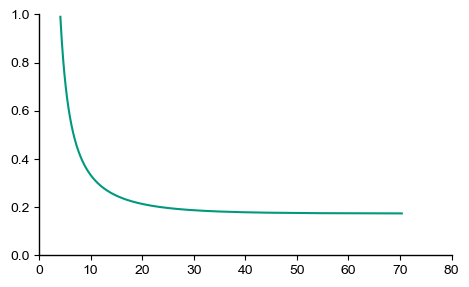

In [58]:
t = numpy_equation(0, 1.1, r_t)
import matplotlib.pyplot as pl
pl.plot(t,r_t)

In [70]:
print(a.lhs)

Integral(1/(_y*(_y*R_0**2 - R_0*sqrt(_y**2*R_0**2 + 4) + 2)), (_y, r(t)))


In [75]:
r, _y, R_0 = sy.symbols("r y R_0")
sy.integrate(1/(_y*(_y*R_0**2 - R_0*sy.sqrt(_y**2*R_0**2 + 4) + 2)), (_y, 0,r))

Integral(1/(y*(R_0**2*y - R_0*sqrt(R_0**2*y**2 + 4) + 2)), (y, 0, r))

In [95]:
sy.series(R0**2*r**2/2 - R0*r*sy.sqrt(R0**2*r**2 + 4)/2 + 1,r,0,3)

1 - R_0*r + R_0**2*r**2/2 + O(r**3)

In [96]:
R0**2*r**2/2 - R0*r*sy.sqrt(R0**2*r**2 + 4)/2 + 1

R_0**2*r**2/2 - R_0*r*sqrt(R_0**2*r**2 + 4)/2 + 1

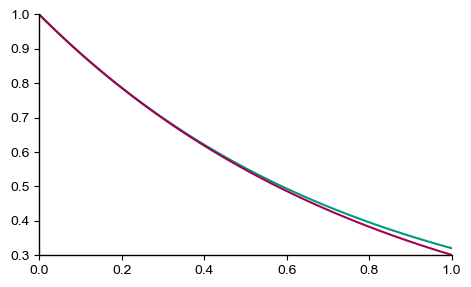

In [100]:
pl.figure()
r = np.linspace(0,1,101)
R0 = 1.2
pl.plot(r,  1 + 0.5*(R0*r)**2 - 0.5*R0*r *np.sqrt((R0*r)**2 + 4))
pl.plot(r, np.exp(-R0*r))

In [102]:
sy.solve(sy.Eq(r, (1/sy.sqrt(s/s0) - sy.sqrt(s/s0))/R0), s)

[s_0*(R_0**2*r**2 - R_0*r*sqrt(R_0**2*r**2 + 4) + 2)/2,
 s_0*(R_0**2*r**2 + R_0*r*sqrt(R_0**2*r**2 + 4) + 2)/2]

In [140]:
def drdt(t, y, R_0, s_0):
    r = y[0]
    return 1 - r - (s_0*(R_0**2*r**2/2 - R_0*r*np.sqrt(R_0**2*r**2/2 + 4) + 1))

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  9.900e+01  1.000e+02]
        y: [[ 0.000e+00  1.166e-05 ...  4.079e-01  4.080e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 128
     njev: 0
      nlu: 0


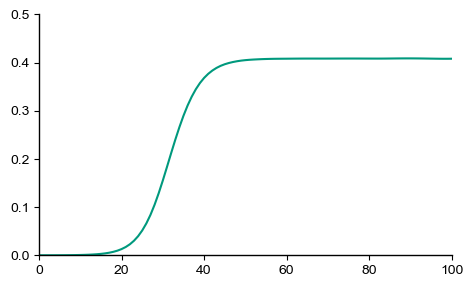

In [126]:
from scipy.integrate import solve_ivp
y0 = 0
_R0 = 1.3
_s0 = 0.99999
t_span = (0.,100.)
t_eval = np.linspace(t_span[0], t_span[1], 101)
res = solve_ivp(drdt, t_span, [y0], args=(_R0, _s0), t_eval=t_eval)
print(res)
pl.figure()
pl.plot(res.t, res.y[0])

In [119]:
np.any(t_eval < min(0., 100.)) or np.any(t_eval > max(0., 100.))

False

In [130]:
sy.solve(sy.Eq(r, (1/z - z)/R0), z)[1]

-R_0*r/2 + sqrt(R_0**2*r**2 + 4)/2

In [139]:
sy.solve(sy.Eq(r, (1/sy.sqrt(z) - sy.sqrt(z))/R0), z)[0]

R_0**2*r**2/2 - R_0*r*sqrt(R_0**2*r**2 + 4)/2 + 1

In [136]:
sy.solve(sy.Eq(R_0*r, sy.sqrt(R_0**2*r**2 + 4)),r)

[]

In [148]:
[a.lhs]

[Integral(1/(_y**2*R_0**2*s_0 - _y*R_0*s_0*sqrt(_y**2*R_0**2 + 4) + 2*_y + 2*s_0 - 2), (_y, r(t)))]

In [ ]:
r = sy.Function('r')
a = sy.dsolve(sy.Eq(sy.Derivative(r(t), t),1-r(t)-s0*(R0**2*r(t)**2 - R0*r(t)*(2+R0**2*r(t)**2) + 2)/2 ),
             ics={r(0): 0})
a

In [5]:
sy.series(sy.sqrt(R0**2*r**2 + 4), r, 0,3)

2 + R_0**2*r**2/4 + O(r**3)

In [7]:
sy.Eq(0,sy.diff(1-r-s0*(1+R0**2*r**2/2 - R0*r*sy.sqrt(1+R0**2*r**2/4)),r))

Eq(0, -s_0*(-R_0**3*r**2/(4*sqrt(R_0**2*r**2/4 + 1)) + R_0**2*r - R_0*sqrt(R_0**2*r**2/4 + 1)))

In [12]:
sy.solve(sy.Eq(0,sy.diff(1-s0*(1+R0**2*r**2/2 - R0*r*sy.sqrt(1+R0**2*r**2/4))-r,r)),r)

[-(-12/R_0**2 + 1/(4*R_0**4*s_0**2))/(3*(sqrt(-4*(-12/R_0**2 + 1/(4*R_0**4*s_0**2))**3 + (27*(-2*R_0**2*s_0**2 + 2)/(R_0**4*s_0) - 18/(R_0**4*s_0) + 1/(4*R_0**6*s_0**3))**2)/2 + 27*(-2*R_0**2*s_0**2 + 2)/(2*R_0**4*s_0) - 9/(R_0**4*s_0) + 1/(8*R_0**6*s_0**3))**(1/3)) - (sqrt(-4*(-12/R_0**2 + 1/(4*R_0**4*s_0**2))**3 + (27*(-2*R_0**2*s_0**2 + 2)/(R_0**4*s_0) - 18/(R_0**4*s_0) + 1/(4*R_0**6*s_0**3))**2)/2 + 27*(-2*R_0**2*s_0**2 + 2)/(2*R_0**4*s_0) - 9/(R_0**4*s_0) + 1/(8*R_0**6*s_0**3))**(1/3)/3 - 1/(6*R_0**2*s_0),
 -(-12/R_0**2 + 1/(4*R_0**4*s_0**2))/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-12/R_0**2 + 1/(4*R_0**4*s_0**2))**3 + (27*(-2*R_0**2*s_0**2 + 2)/(R_0**4*s_0) - 18/(R_0**4*s_0) + 1/(4*R_0**6*s_0**3))**2)/2 + 27*(-2*R_0**2*s_0**2 + 2)/(2*R_0**4*s_0) - 9/(R_0**4*s_0) + 1/(8*R_0**6*s_0**3))**(1/3)) - (-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-12/R_0**2 + 1/(4*R_0**4*s_0**2))**3 + (27*(-2*R_0**2*s_0**2 + 2)/(R_0**4*s_0) - 18/(R_0**4*s_0) + 1/(4*R_0**6*s_0**3))**2)/2 + 27*(-2*R_0**2*s_0**2 + 2)/(2*R_0**

In [13]:
s = s0*(1+R0**2*r**2/2 - R0*r*sy.sqrt(1+R0**2*r**2/4))
j = 1-r-s
sy.Eq(0, R0*s*j - j)

Eq(0, R_0*s_0*(-r - s_0*(R_0**2*r**2/2 - R_0*r*sqrt(R_0**2*r**2/4 + 1) + 1) + 1)*(R_0**2*r**2/2 - R_0*r*sqrt(R_0**2*r**2/4 + 1) + 1) + r + s_0*(R_0**2*r**2/2 - R_0*r*sqrt(R_0**2*r**2/4 + 1) + 1) - 1)

In [16]:
(sy.sqrt(R0) - sy.sqrt(1/R0))/R0

(sqrt(R_0) - sqrt(1/R_0))/R_0

In [18]:
1/sy.sqrt(R0) - (1/R0)**(3/2)

-(1/R_0)**1.5 + 1/sqrt(R_0)

In [33]:
s, s0, R0 = sy.symbols("s s_0 R_0")
sy.solve(sy.Eq(1-s, (1/sy.sqrt(s/s0) - sy.sqrt(s/s0))/R0), s)

KeyboardInterrupt: 

In [41]:
x, e = sy.symbols("x epsilon")
sy.series(2*sy.asinh(x/2),x,0,10)

x - x**3/24 + 3*x**5/640 - 5*x**7/7168 + 35*x**9/294912 + O(x**10)

In [42]:
sy.series(sy.sqrt(x**2 + 1),x,0,10)

1 + x**2/2 - x**4/8 + x**6/16 - 5*x**8/128 + O(x**10)